In [2]:
import pandas as pd 
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

import plotly.express as px
import time 

from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB #

from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from nltk.tokenize import RegexpTokenizer 
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
from selenium import webdriver # use for automation chrome 
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model 

import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')



In [3]:
phish_data = pd.read_csv('malicious_phish.csv')

In [4]:
phish_data.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [5]:
phish_data.tail()

,url,type
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing
651190,www.angelfire.com/goth/devilmaycrytonite/,phishing


In [6]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [7]:
phish_data.isnull().sum()

url     0
type    0
dtype: int64

In [9]:
label_counts = pd.DataFrame(phish_data.type)

In [10]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [12]:
phish_data.url[0]

'br-icloud.com.br'

In [14]:
tokenizer.tokenize(phish_data.url[0]) 

['br', 'icloud', 'com', 'br']

In [16]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.url.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')


Getting words tokenized ...
Time taken 4.180106000043452 sec


In [17]:
phish_data.sample(5)


,url,type,text_tokenized
577158,prisme-topo.fr/logs/,benign,"[prisme, topo, fr, logs]"
192295,healthgrades.com/physician/dr-richard-myers-3c...,benign,"[healthgrades, com, physician, dr, richard, my..."
518820,linkedin.com/in/brianlorence,benign,"[linkedin, com, in, brianlorence]"
496528,nipissingongenweb.org/id24.html,benign,"[nipissingongenweb, org, id, html]"
31313,youtube.com/watch?v=NMiJD4u4HmE,benign,"[youtube, com, watch, v, NMiJD, u, HmE]"


In [18]:
stemmer = SnowballStemmer("english")


In [19]:
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 82.95664039999247 sec


In [20]:
phish_data.sample(5)

,url,type,text_tokenized,text_stemmed
204642,martindale.com/Marguerite-N-Woung-Chapman/1664...,benign,"[martindale, com, Marguerite, N, Woung, Chapma...","[martindal, com, marguerit, n, woung, chapman,..."
192809,planetsuzy.org/showthread.php?t=4182,benign,"[planetsuzy, org, showthread, php, t]","[planetsuzi, org, showthread, php, t]"
614720,www.ogi.edu/csee/,phishing,"[www, ogi, edu, csee]","[www, ogi, edu, csee]"
237760,municipality.mylucena.com/,benign,"[municipality, mylucena, com]","[municip, mylucena, com]"
285349,http://lifehacker.com/5829379/make-your-own-hd...,benign,"[http, lifehacker, com, make, your, own, hdtv,...","[http, lifehack, com, make, your, own, hdtv, a..."


In [21]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.5088198001030833 sec


In [22]:
phish_data.sample(5)

,url,type,text_tokenized,text_stemmed,text_sent
305781,crowncares.com/,benign,"[crowncares, com]","[crowncar, com]",crowncar com
358302,siu.academia.edu/MicheleTorre/Papers/297198/DA...,benign,"[siu, academia, edu, MicheleTorre, Papers, DAN...","[siu, academia, edu, micheletorr, paper, dange...",siu academia edu micheletorr paper danger beau...
360954,all-acronyms.com/cat/2/MACOM,benign,"[all, acronyms, com, cat, MACOM]","[all, acronym, com, cat, macom]",all acronym com cat macom
312433,celebritydetective.com/Kelly-Clarksons-Texas-h...,benign,"[celebritydetective, com, Kelly, Clarksons, Te...","[celebritydetect, com, kelli, clarkson, texa, ...",celebritydetect com kelli clarkson texa hous html
141852,http://www.methoni.gov.gr/Default.aspx?tabid=63,defacement,"[http, www, methoni, gov, gr, Default, aspx, t...","[http, www, methoni, gov, gr, default, aspx, t...",http www methoni gov gr default aspx tabid


In [24]:
phising_sites = phish_data[phish_data.type == 'phishing']
good_sites = phish_data[phish_data.type == 'benign']
defacement_sites = phish_data[phish_data.type == 'defacement']
malware_sites = phish_data[phish_data.type == 'malware']

In [26]:
phising_sites.head()

,url,type,text_tokenized,text_stemmed,text_sent
0,br-icloud.com.br,phishing,"[br, icloud, com, br]","[br, icloud, com, br]",br icloud com br
21,signin.eby.de.zukruygxctzmmqi.civpro.co.za,phishing,"[signin, eby, de, zukruygxctzmmqi, civpro, co,...","[signin, ebi, de, zukruygxctzmmqi, civpro, co,...",signin ebi de zukruygxctzmmqi civpro co za
28,http://www.marketingbyinternet.com/mo/e56508df...,phishing,"[http, www, marketingbyinternet, com, mo, e, d...","[http, www, marketingbyinternet, com, mo, e, d...",http www marketingbyinternet com mo e df f ce ...
40,https://docs.google.com/spreadsheet/viewform?f...,phishing,"[https, docs, google, com, spreadsheet, viewfo...","[https, doc, googl, com, spreadsheet, viewform...",https doc googl com spreadsheet viewform formk...
72,retajconsultancy.com,phishing,"[retajconsultancy, com]","[retajconsult, com]",retajconsult com


In [29]:
phising_sites.info()
good_sites.info() 
defacement_sites.info() 
malware_sites.info() 



<class 'pandas.core.frame.DataFrame'>
Int64Index: 94111 entries, 0 to 651190
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   url             94111 non-null  object
 1   type            94111 non-null  object
 2   text_tokenized  94111 non-null  object
 3   text_stemmed    94111 non-null  object
 4   text_sent       94111 non-null  object
dtypes: object(5)
memory usage: 4.3+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 428103 entries, 1 to 603181
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   url             428103 non-null  object
 1   type            428103 non-null  object
 2   text_tokenized  428103 non-null  object
 3   text_stemmed    428103 non-null  object
 4   text_sent       428103 non-null  object
dtypes: object(5)
memory usage: 19.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 96457 entries, 3 to 520325


In [31]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

In [33]:
common_text = str(data)
common_mask = np.array(Image.open(d+'comment.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words use in bad urls', title_size=15)

FileNotFoundError: [Errno 2] No such file or directory: '../input/masks/masks-wordclouds/comment.png'

In [34]:
cv = CountVectorizer()

In [35]:
help(CountVectorizer())

Help on CountVectorizer in module sklearn.feature_extraction.text object:

class CountVectorizer(_VectorizerMixin, sklearn.base.BaseEstimator)
 |  CountVectorizer(*, input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)
 |  
 |  Convert a collection of text documents to a matrix of token counts.
 |  
 |  This implementation produces a sparse representation of the counts using
 |  scipy.sparse.csr_matrix.
 |  
 |  If you do not provide an a-priori dictionary and you do not use an analyzer
 |  that does some kind of feature selection then the number of features will
 |  be equal to the vocabulary size found by analyzing the data.
 |  
 |  Read more in the :ref:`User Guide <text_feature_extraction>`.
 |  
 |  Parameters
 |  ----

In [36]:
feature = cv.fit_transform(phish_data.text_sent) 

In [37]:
feature[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [39]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.type)

In [40]:
lr = LogisticRegression()

In [41]:
lr.fit(trainX,trainY)

LogisticRegression()

In [42]:
lr.score(testX,testY)

0.951762306662244

In [43]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9639143067161077
Testing Accuracy : 0.951762306662244

CLASSIFICATION REPORT

              precision    recall  f1-score   support

    phishing       0.99      0.95      0.97    110923
      benign       1.00      0.99      0.99     24489
  defacement       0.96      0.98      0.97      7808
     malware       0.75      0.91      0.82     19578

    accuracy                           0.95    162798
   macro avg       0.92      0.96      0.94    162798
weighted avg       0.96      0.95      0.95    162798


CONFUSION MATRIX


<Axes: >

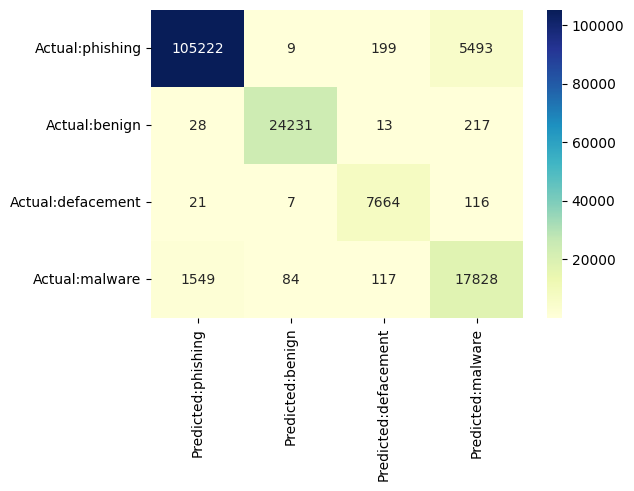

In [44]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:phishing', 'Predicted:benign','Predicted:defacement','Predicted:malware'],
            index = ['Actual:phishing', 'Actual:benign','Actual:defacement','Actual:malware'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['phishing','benign','defacement','malware']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [45]:
# create mnb object
mnb = MultinomialNB()

In [46]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [47]:
mnb.score(testX,testY)

0.9029656383985061

In [48]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.9320076250069104
Testing Accuracy : 0.9029656383985061

CLASSIFICATION REPORT

              precision    recall  f1-score   support

    phishing       0.94      0.93      0.94    108276
      benign       0.97      0.89      0.93     26694
  defacement       0.87      0.96      0.91      7278
     malware       0.66      0.76      0.71     20550

    accuracy                           0.90    162798
   macro avg       0.86      0.88      0.87    162798
weighted avg       0.91      0.90      0.91    162798


CONFUSION MATRIX


<Axes: >

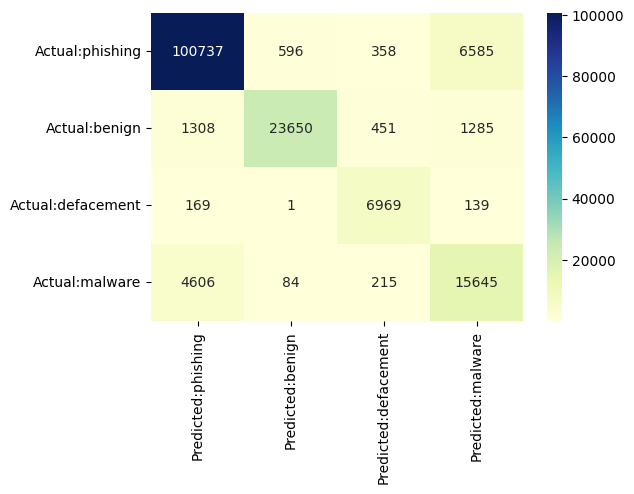

In [49]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:phishing', 'Predicted:benign','Predicted:defacement','Predicted:malware'],
            index = ['Actual:phishing', 'Actual:benign','Actual:defacement','Actual:malware'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['phishing','benign','defacement','malware']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [50]:
acc = pd.DataFrame.from_dict(Scores_ml,orient = 'index',columns=['Accuracy'])
sns.set_style('darkgrid')
sns.barplot(acc.index,acc.Accuracy)

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [51]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())

In [52]:
trainX, testX, trainY, testY = train_test_split(phish_data.url, phish_data.type)

In [53]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [54]:
pipeline_ls.score(testX,testY) 

0.9508839174928438

Training Accuracy : 0.9627492613530497
Testing Accuracy : 0.9508839174928438

CLASSIFICATION REPORT

              precision    recall  f1-score   support

    phishing       0.98      0.95      0.97    111135
      benign       1.00      0.99      0.99     24341
  defacement       0.95      0.98      0.97      7915
     malware       0.75      0.91      0.82     19407

    accuracy                           0.95    162798
   macro avg       0.92      0.96      0.94    162798
weighted avg       0.96      0.95      0.95    162798


CONFUSION MATRIX


<Axes: >

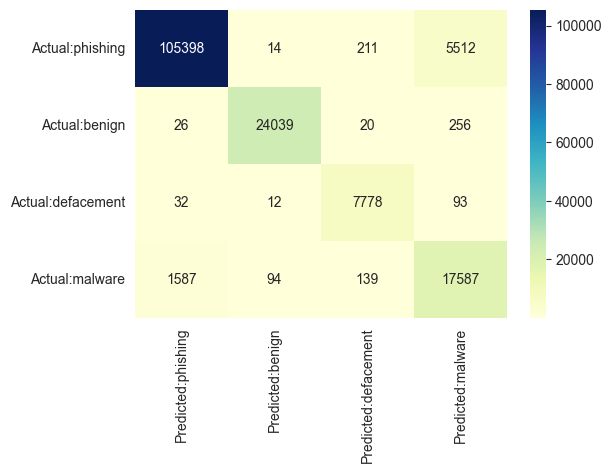

In [55]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns =  ['Predicted:phishing', 'Predicted:benign','Predicted:defacement','Predicted:malware'],
            index = ['Actual:phishing', 'Actual:benign','Actual:defacement','Actual:malware'])



print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['phishing','benign','defacement','malware']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [56]:
pickle.dump(pipeline_ls,open('myown.pkl','wb'))

In [57]:
loaded_model = pickle.load(open('myown.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9508839174928438


In [58]:
predict_bad = ['oracle.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtube','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

['bad' 'bad' 'bad' 'bad']
******************************
['good' 'good' 'good' 'good']
